In [1]:
from m8r import view 

In [2]:
#ls

In [3]:
%%file datos.scons 

entrada = 'subvolumen_amp_sg_chocol_time_h61055.sgy'
mult2 = 'mult2-sg.sgy'
mult3 = 'mult3-sg.sgy'
mult_n1n3 = 'sumn1n3-sg.sgy'
mult_n1n3n5 = 'sumn1n3n5-sg.sgy'

Flow('seudo2d', entrada, 'segyread tfile=tfile.rsf bfile=bfile hfile=hfile verb=y endian=y')
Flow('cubo', 'seudo2d', '''intbin inv=n head=tfile.rsf xk=xline yk=iline | put label1=Tiempo 
     label3=inline label2=xline | window  min1=0 max1=5.1''')

Flow('mult2-seudo2d', mult2, 'segyread tfile=tfile1.rsf bfile=bfile hfile=hfile verb=y endian=y')
Flow('cubo-mult2', 'mult2-seudo2d', '''intbin inv=n head=tfile.rsf xk=xline yk=iline | put label1=Tiempo 
     label3=inline label2=xline | window  min1=0 max1=5.1''')

Flow('mult3-seudo2d', mult3, 'segyread tfile=tfile1.rsf bfile=bfile hfile=hfile verb=y endian=y')
Flow('cubo-mult3', 'mult3-seudo2d', '''intbin inv=n head=tfile.rsf xk=xline yk=iline | put label1=Tiempo 
     label3=inline label2=xline | window  min1=0 max1=5.1''')

Flow('multn1n3-seudo2d', mult_n1n3, 'segyread tfile=tfile1.rsf bfile=bfile hfile=hfile verb=y endian=y')
Flow('cubo-multn1n3', 'multn1n3-seudo2d', '''intbin inv=n head=tfile.rsf xk=xline yk=iline | put label1=Tiempo 
     label3=inline label2=xline | window  min1=0 max1=5.1''')

Flow('multn1n3n5-seudo2d', mult_n1n3n5, 'segyread tfile=tfile1.rsf bfile=bfile hfile=hfile verb=y endian=y')
Flow('cubo-multn1n3n5', 'multn1n3n5-seudo2d', '''intbin inv=n head=tfile.rsf xk=xline yk=iline | put label1=Tiempo 
     label3=inline label2=xline | window  min1=0 max1=5.1''')


Overwriting datos.scons


In [4]:
%%file deriv.scons

Flow('der2', 'cubo', 'deriv | deriv | scale dscale=-1 ')
Flow('der4', 'cubo', 'deriv | deriv | deriv | deriv ')

Overwriting deriv.scons


In [5]:
%%file display_deriv.scons

Plot('cubo-ori', 'cubo', '''byte gainpanel=all | grey3 frame1=500 frame2=60 frame3=150 
       title="a) Datos originales" flat=n point1=0.35 point2=0.78 point3=0.7 color=e ''' )
Plot('cubo-deriv2', 'der2', '''byte gainpanel=all | grey3 frame1=500 frame2=60 frame3=150 
       title="b) 2da derivada" flat=n point1=0.35 point2=0.78 point3=0.7 color=e ''' )
Plot('cubo-deriv4', 'der4', ''' byte gainpanel=all | grey3 frame1=500 frame2=60 frame3=150 
       title="c) 4ta derivada" flat=n point1=0.35 point2=0.78 point3=0.7 color=e ''' )

Result('fig1', 'cubo-ori cubo-deriv2 cubo-deriv4', 'SideBySideAniso' )

Overwriting display_deriv.scons


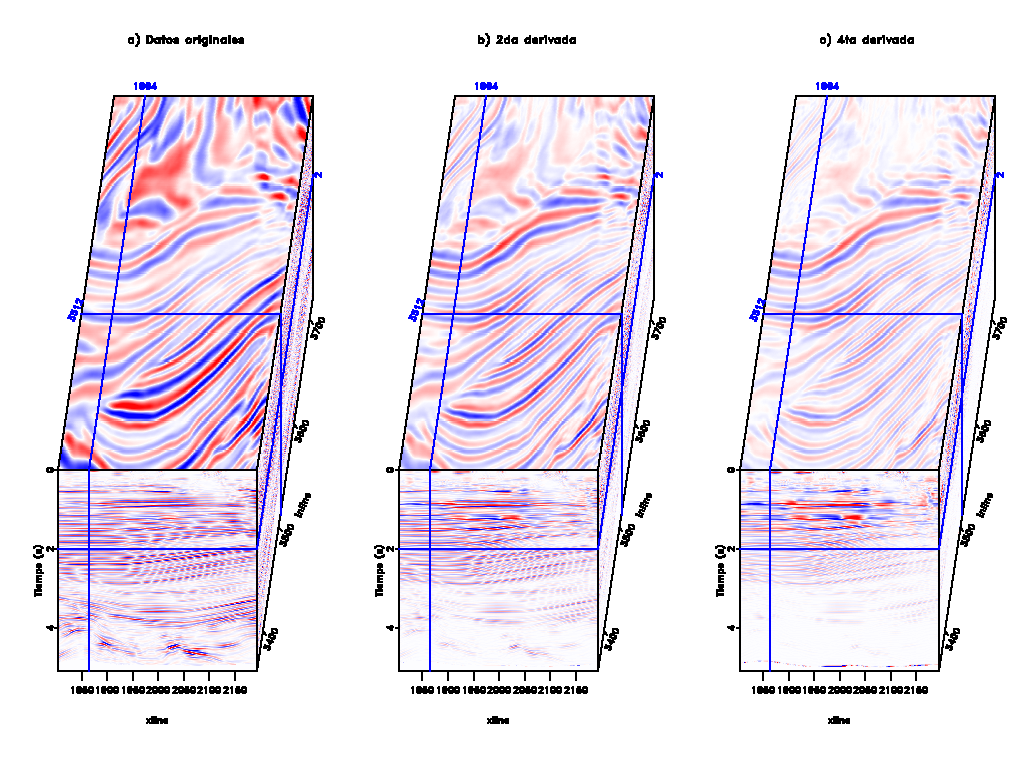

In [41]:
view('fig1')

In [7]:
%%file display_multi.scons

Plot('cubo-ori', 'cubo', '''byte gainpanel=all | grey3 frame1=500 frame2=60 frame3=150 
       title="a) Datos originales" flat=n point1=0.35 point2=0.78 point3=0.7 color=e ''' )
Plot('cubo-mult2', 'cubo-mult2', '''byte gainpanel=all | grey3 frame1=500 frame2=60 frame3=150 
       title="d) Multiplicador N2" flat=n point1=0.35 point2=0.78 point3=0.7 color=e ''' )
Plot('cubo-mult3', 'cubo-mult3', '''byte gainpanel=all | grey3 frame1=500 frame2=60 frame3=150 
       title="e) Multiplicador N3" flat=n point1=0.35 point2=0.78 point3=0.7 color=e ''' )
Plot('cubo-sum_n1n3', 'cubo-multn1n3', ''' byte gainpanel=all | grey3 frame1=500 frame2=60 frame3=150 
       title="f) Multiplicador N1+N3" flat=n point1=0.35 point2=0.78 point3=0.7 color=e ''' )

Result('fig2', 'cubo-ori cubo-mult2 cubo-sum_n1n3', 'SideBySideAniso' )

Overwriting display_multi.scons


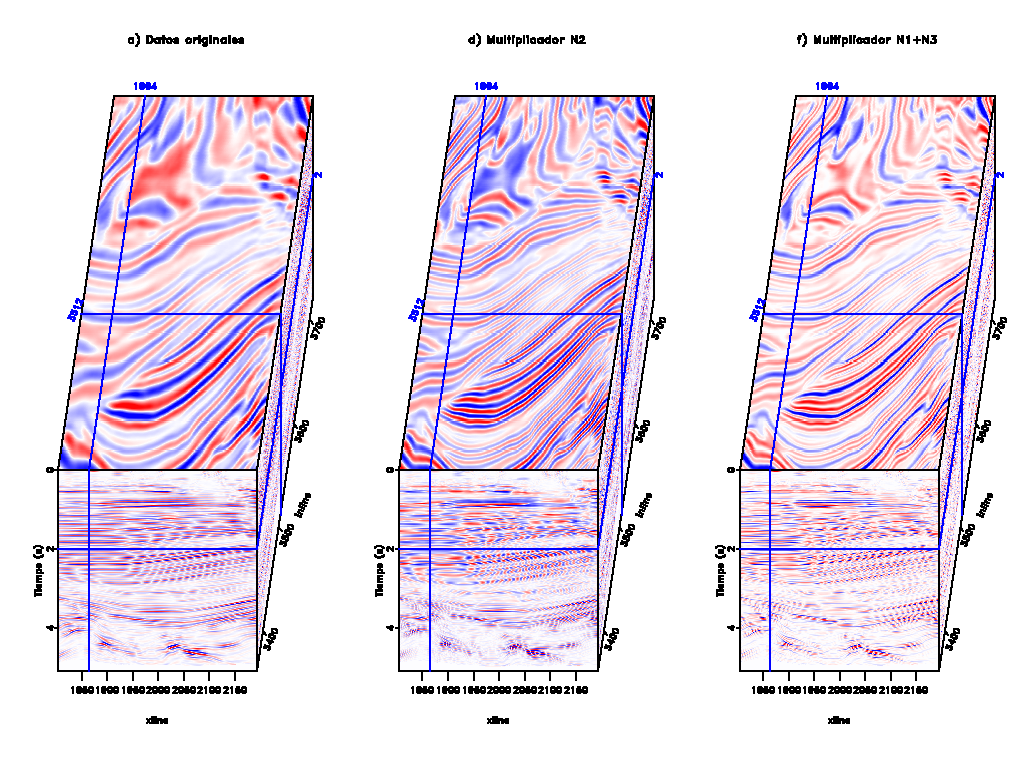

In [43]:
view('fig2')

In [9]:
%%file display_incremento.scons

Result('fig3', 'cubo-ori cubo-deriv2 cubo-deriv4 cubo-mult2 cubo-mult3 cubo-sum_n1n3', 'TwoRows' )

Overwriting display_incremento.scons


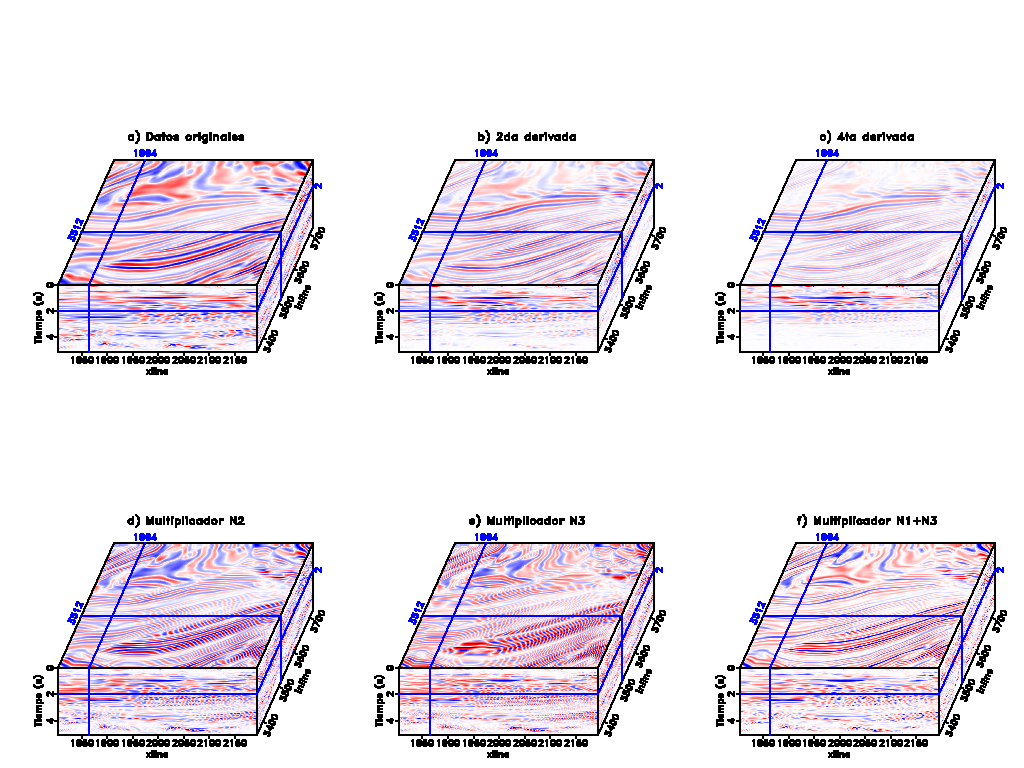

In [10]:
view('fig3')

### Selección de la linea longitudinal 3458

In [11]:
%%file inline.scons

Flow('inline3458-ori','cubo','window min3=3458 n3=1')
Flow('inline3458-der2','der2','window min3=3458 n3=1')
Flow('inline3458-der4','der4','window min3=3458 n3=1')
Flow('inline3458-mult2','cubo-mult2','window min3=3458 n3=1')
Flow('inline3458-mult3','cubo-mult3','window min3=3458 n3=1')
Flow('inline3458-multn1n3','cubo-multn1n3','window min3=3400 n3=1')
Flow('inline3458-multn1n3n5','cubo-multn1n3n5','window min3=3400 n3=1')
#Flow('inline3400-multn1n3n5','cubo-multn1n3n5','window min3=3400 n3=1')

Overwriting inline.scons


In [12]:
%%file inline_plot.scons

Plot('inline-3458-ori', 'inline3458-ori', 'grey title="a) Datos original" color=e')
Plot('inline-3458-der2', 'inline3458-der2', 'grey title="b) 2da derivada" color=e')
Plot('inline-3458-der4', 'inline3458-der4', 'grey title="c) 4ta derivada" color=e')
Plot('inline-3458-mult2', 'inline3458-mult2', 'grey title="d) Multiplicador N2" color=e')
Plot('inline-3458-mult3', 'inline3458-mult3', 'grey title="e) Multiplicador N3" color=e')
Plot('inline-3458-multn1n3', 'inline3458-multn1n3', 'grey title="f) Multiplicador N1+N3" color=e')
#Plot('inline-3400-multn1n3n5', 'inline3400-multn1n3n5', 'grey')
Result('fig4', 'inline-3458-ori inline-3458-der2 inline-3458-der4', 'SideBySideAniso')
Result('fig5', 'inline-3458-ori inline-3458-mult2', 'SideBySideAniso')
Result('fig6', 'inline-3458-ori inline-3458-der2 inline-3458-mult2','SideBySideAniso')

Overwriting inline_plot.scons


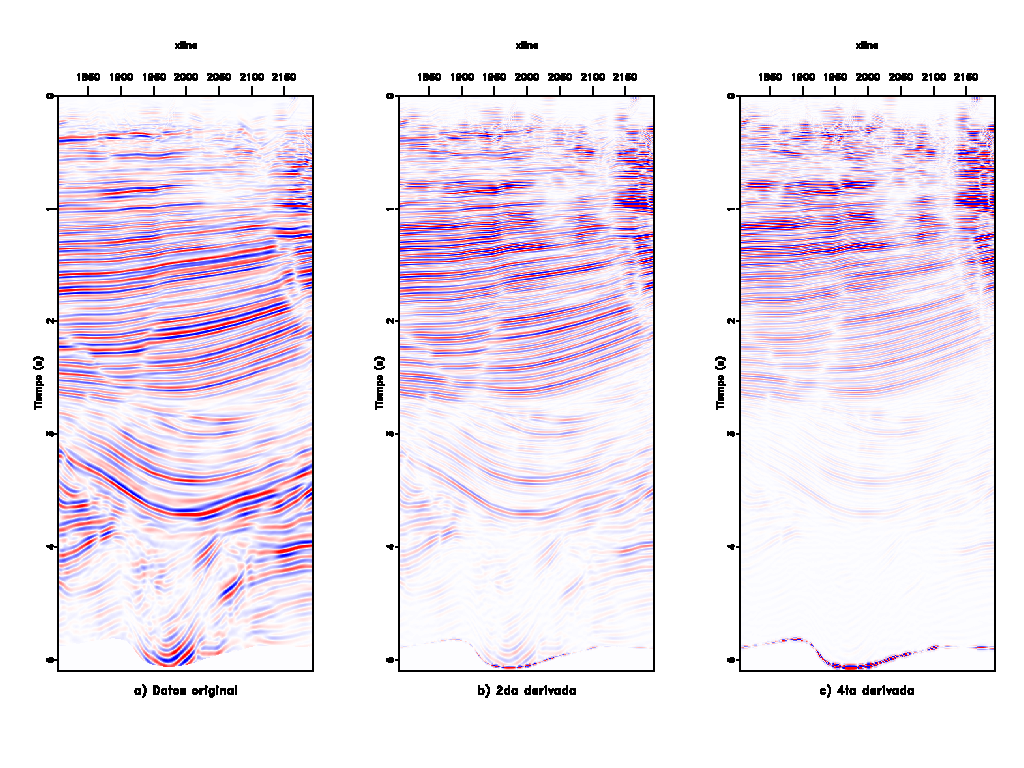

In [13]:
view('fig4')

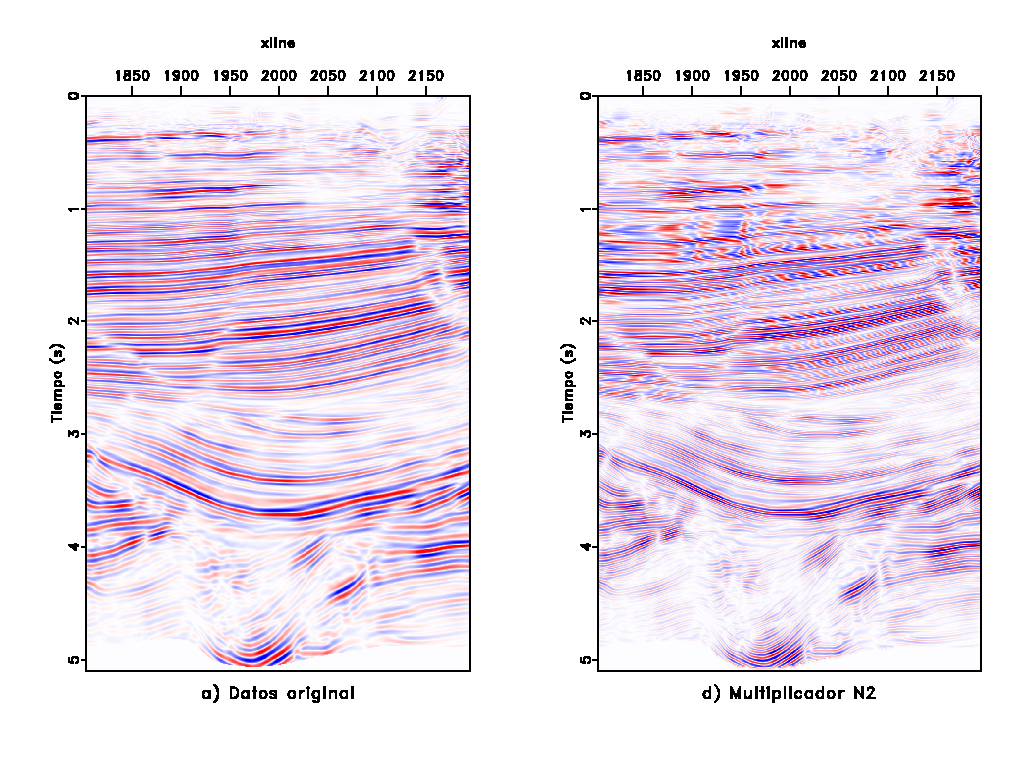

In [14]:
view('fig5')

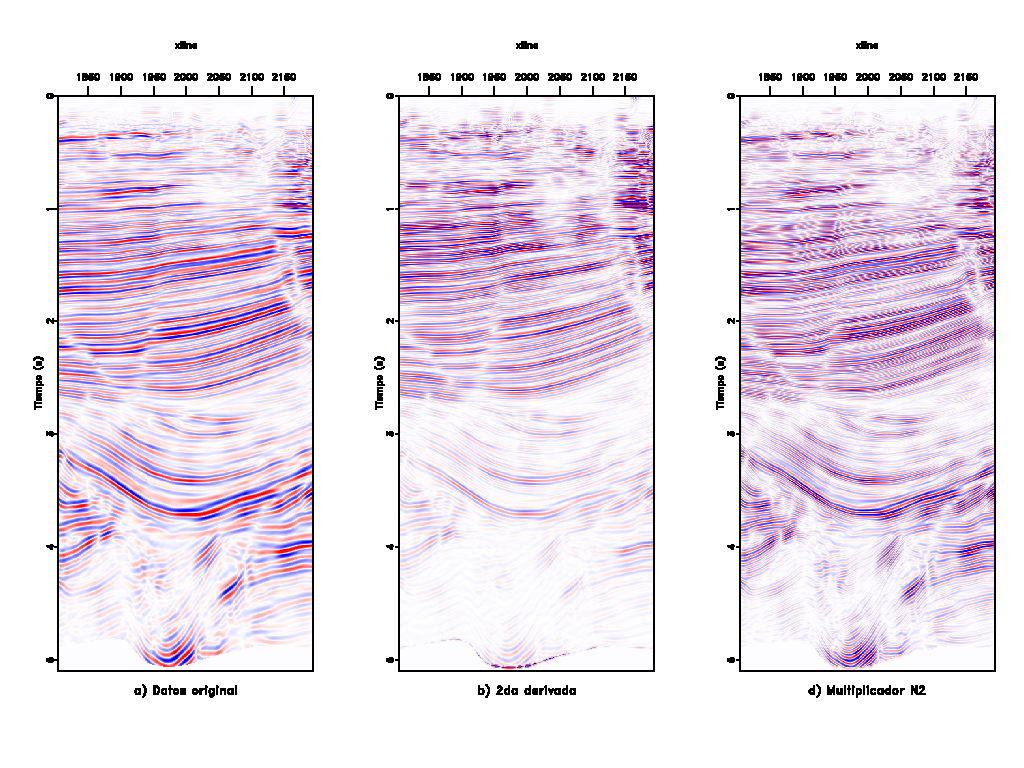

In [15]:
view('fig6')

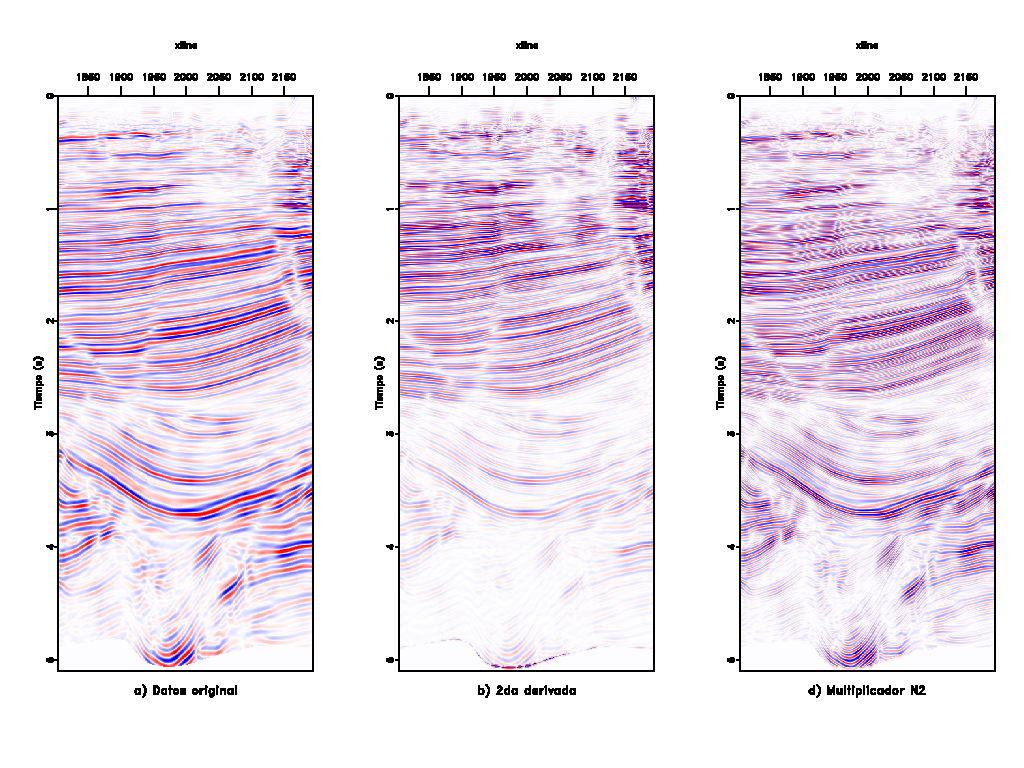

In [16]:
view('fig6')

In [17]:
%%file make_header.scons
#Definir el encabezado para la linea longitudinal 3458
Flow('tdata','inline3458-ori','segyheader inline3458-ori=${SOURCES[1]}')
# Convertir los archivos RSF a SEGY
Flow('inline-3458-ori.sgy','inline3458-ori tdata','segywrite tfile=${SOURCES[1]}')
Flow('inline-3458-der2.sgy','inline3458-der2 tdata','segywrite tfile=${SOURCES[1]}')
Flow('inline-3458-der4.sgy','inline3458-der4 tdata','segywrite tfile=${SOURCES[1]}')
Flow('inline-3458-mult2.sgy','inline3458-mult2 tdata','segywrite tfile=${SOURCES[1]}')
Flow('inline-3458-mult3.sgy','inline3458-mult3 tdata','segywrite tfile=${SOURCES[1]}')
Flow('inline-3458-multn1n3.sgy','inline3458-multn1n3 tdata','segywrite tfile=${SOURCES[1]}')
Flow('inline-3458-multn1n3n5.sgy','inline3458-multn1n3n5 tdata','segywrite tfile=${SOURCES[1]}')

Overwriting make_header.scons


In [18]:
#ls

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

In [20]:
from obspy.io.segy.segy import _read_segy

In [39]:
#ls

In [22]:
ori = _read_segy('inline-3458-ori.sgy', headonly=True)
der2 = _read_segy('inline-3458-der2.sgy', headonly=True)
der4 = _read_segy('inline-3458-der4.sgy', headonly=True)
mult2 = _read_segy('inline-3458-mult2.sgy', headonly=True)
mult3 = _read_segy('inline-3458-mult3.sgy', headonly=True)
multn1n3 = _read_segy('inline-3458-multn1n3.sgy', headonly=True)
multn1n3n5 = _read_segy('inline-3458-multn1n3n5.sgy', headonly=True)
balesp = _read_segy('pareto_in3458_balanceo.sgy', headonly=True)
balesp1 = _read_segy('inline-3458-d_recon_cmp_All_SPEC_ALL.sgy', headonly=True)
balesp2 = _read_segy('inline3458-d_recon_cwt_All_CWT.sgy', headonly=True)

In [23]:
#Apilar trazas
inline_ori = np.stack(t.data for t in ori.traces)
inline_der2 = np.stack(t.data for t in der2.traces)
inline_balesp = np.stack(t.data for t in balesp.traces)
inline_balesp1 = np.stack(t.data for t in balesp1.traces)
inline_balesp2 = np.stack(t.data for t in balesp2.traces)

In [24]:
vma = np.percentile(inline_ori, 99)
vmb = np.percentile(inline_der2, 99)
vmc = np.percentile(inline_balesp, 99)
vmd = np.percentile(inline_balesp1, 99)
vme = np.percentile(inline_balesp2, 99)

In [25]:
print(vmc)

0.261148691177


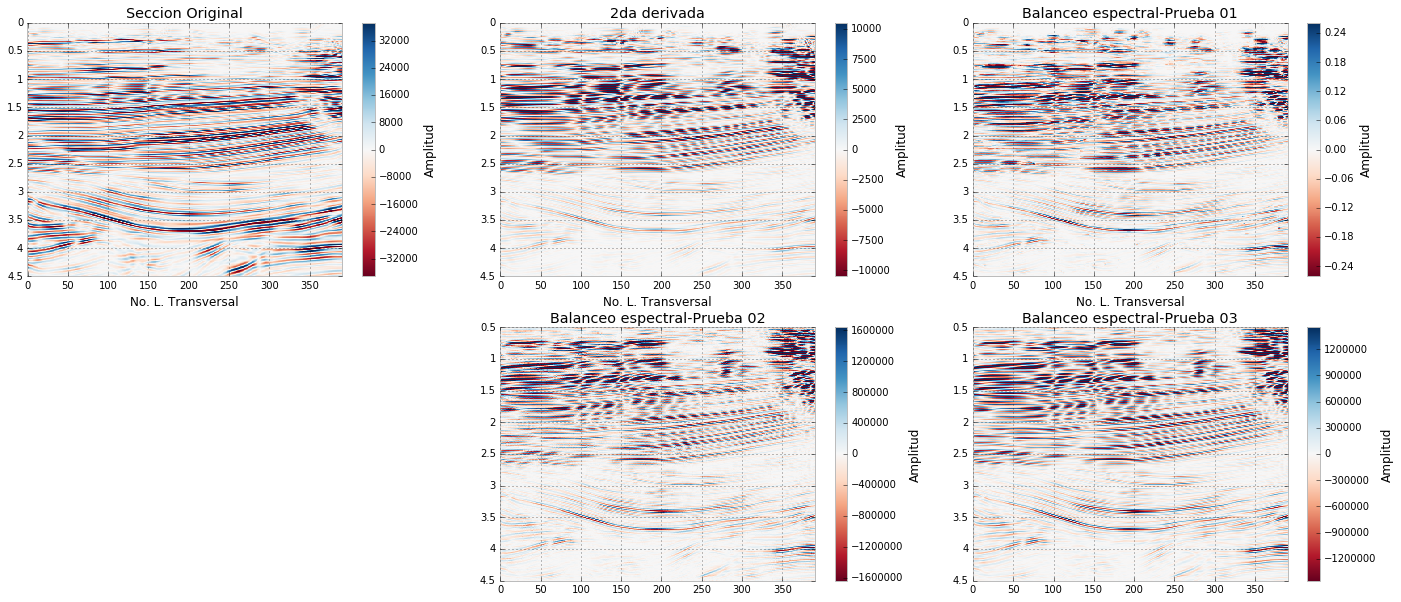

In [26]:
plt.figure(figsize=(24,10))
#---------------------------------------------------------------------------------
a=plt.subplot(231)
plt.imshow(inline_ori.T, cmap="RdBu", vmin=-vma, vmax=vma, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0); plt.yticks(np.arange(0,1126,125), [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
a.set_title('Seccion Original'); a.set_xlabel('No. L. Transversal')
cbar= plt.colorbar()
cbar.set_label('Amplitud')

b=plt.subplot(232)
plt.imshow(inline_der2.T, cmap="RdBu", vmin=-vmb, vmax=vmb, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0); plt.yticks(np.arange(0,1126,125), [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
b.set_title('2da derivada'); b.set_xlabel('No. L. Transversal')
cbar= plt.colorbar(); cbar.set_label('Amplitud')

c=plt.subplot(233)
plt.imshow(inline_balesp.T, cmap="RdBu", vmin=-vmc, vmax=vmc, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0); plt.yticks(np.arange(0,1126,125), [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
c.set_title('Balanceo espectral-Prueba 01'); c.set_xlabel('No. L. Transversal')
cbar= plt.colorbar(); cbar.set_label('Amplitud')

d=plt.subplot(235)
plt.imshow(inline_balesp1.T, cmap="RdBu", vmin=-vmd, vmax=vmd, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0.5); plt.yticks(np.arange(0,1001,125), [0.5,1,1.5,2,2.5,3,3.5,4,4.5])
d.set_title('Balanceo espectral-Prueba 02'); c.set_xlabel('No. L. Transversal')
cbar= plt.colorbar(); cbar.set_label('Amplitud')

e=plt.subplot(236)
plt.imshow(inline_balesp2.T, cmap="RdBu", vmin=-vme, vmax=vme, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0.5); plt.yticks(np.arange(0,1001,125), [0.5,1,1.5,2,2.5,3,3.5,4,4.5])
e.set_title('Balanceo espectral-Prueba 03'); c.set_xlabel('No. L. Transversal')
cbar= plt.colorbar(); cbar.set_label('Amplitud')

plt.show()

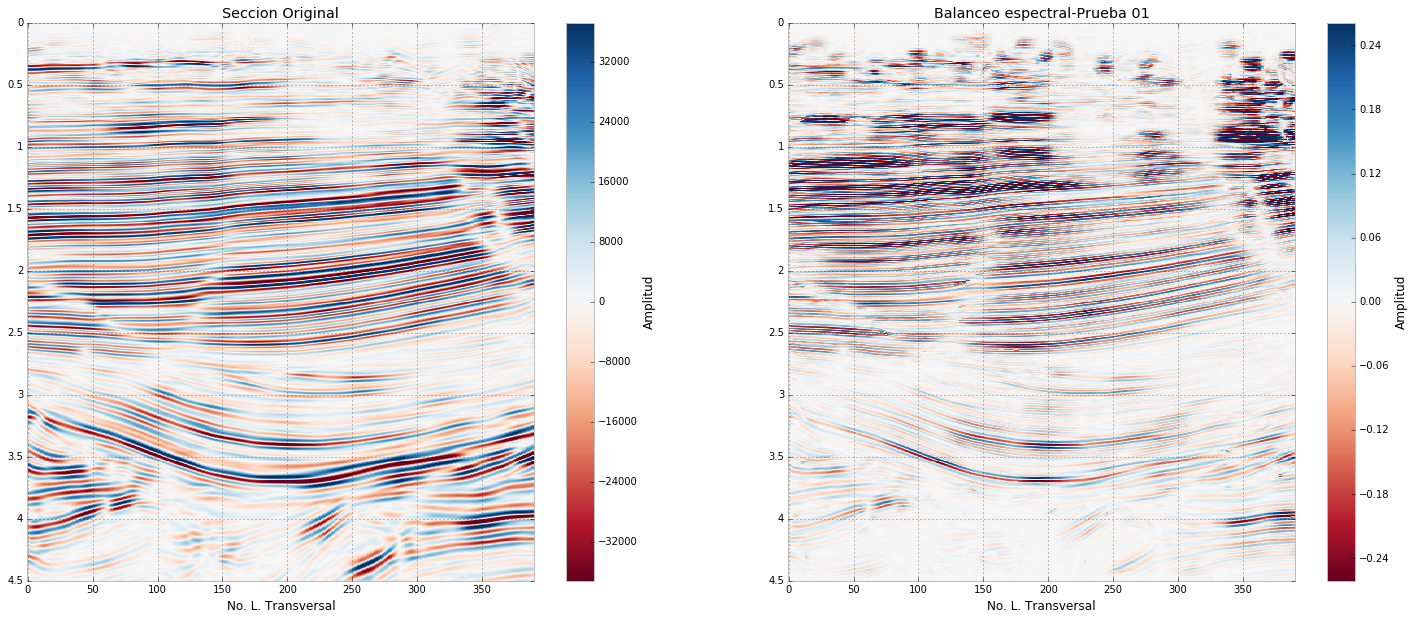

In [27]:
plt.figure(figsize=(25,10))
#---------------------------------------------------------------------------------
a=plt.subplot(121) #Modificar la inline 3458 original para compararla con inline_balesp1 y inline_balesp2
plt.imshow(inline_ori.T, cmap="RdBu", vmin=-vma, vmax=vma, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0); plt.yticks(np.arange(0,1126,125), [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
a.set_title('Seccion Original'); a.set_xlabel('No. L. Transversal')
cbar= plt.colorbar()
cbar.set_label('Amplitud')

c=plt.subplot(122)
plt.imshow(inline_balesp.T, cmap="RdBu", vmin=-vmc, vmax=vmc, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0); plt.yticks(np.arange(0,1126,125), [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
c.set_title('Balanceo espectral-Prueba 01'); c.set_xlabel('No. L. Transversal')
cbar= plt.colorbar(); cbar.set_label('Amplitud')

plt.show()

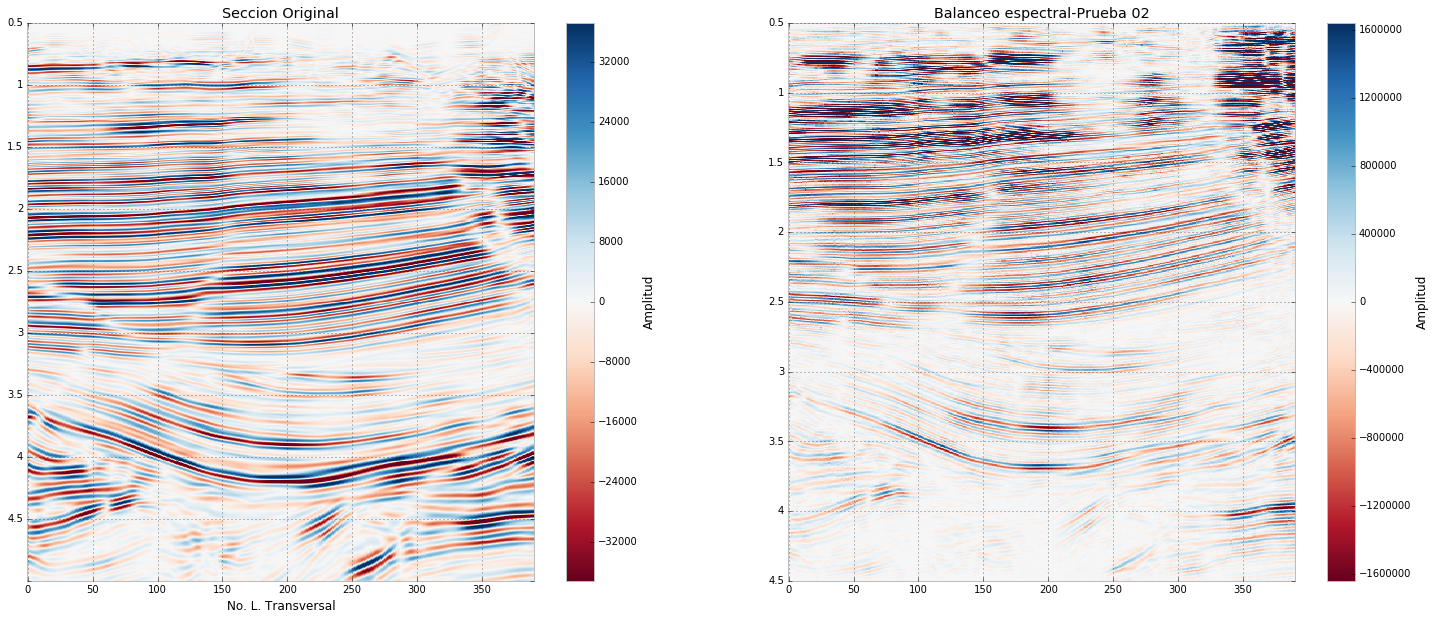

In [28]:
plt.figure(figsize=(25,10))
#---------------------------------------------------------------------------------
a=plt.subplot(121)
plt.imshow(inline_ori.T, cmap="RdBu", vmin=-vma, vmax=vma, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0.5); plt.yticks(np.arange(0,1126,125), [0.5,1,1.5,2,2.5,3,3.5,4,4.5])
a.set_title('Seccion Original'); a.set_xlabel('No. L. Transversal')
cbar= plt.colorbar()
cbar.set_label('Amplitud')

d=plt.subplot(122)
plt.imshow(inline_balesp1.T, cmap="RdBu", vmin=-vmd, vmax=vmd, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0.5); plt.yticks(np.arange(0,1001,125), [0.5,1,1.5,2,2.5,3,3.5,4,4.5])
d.set_title('Balanceo espectral-Prueba 02'); c.set_xlabel('No. L. Transversal')
cbar= plt.colorbar(); cbar.set_label('Amplitud')

plt.show()

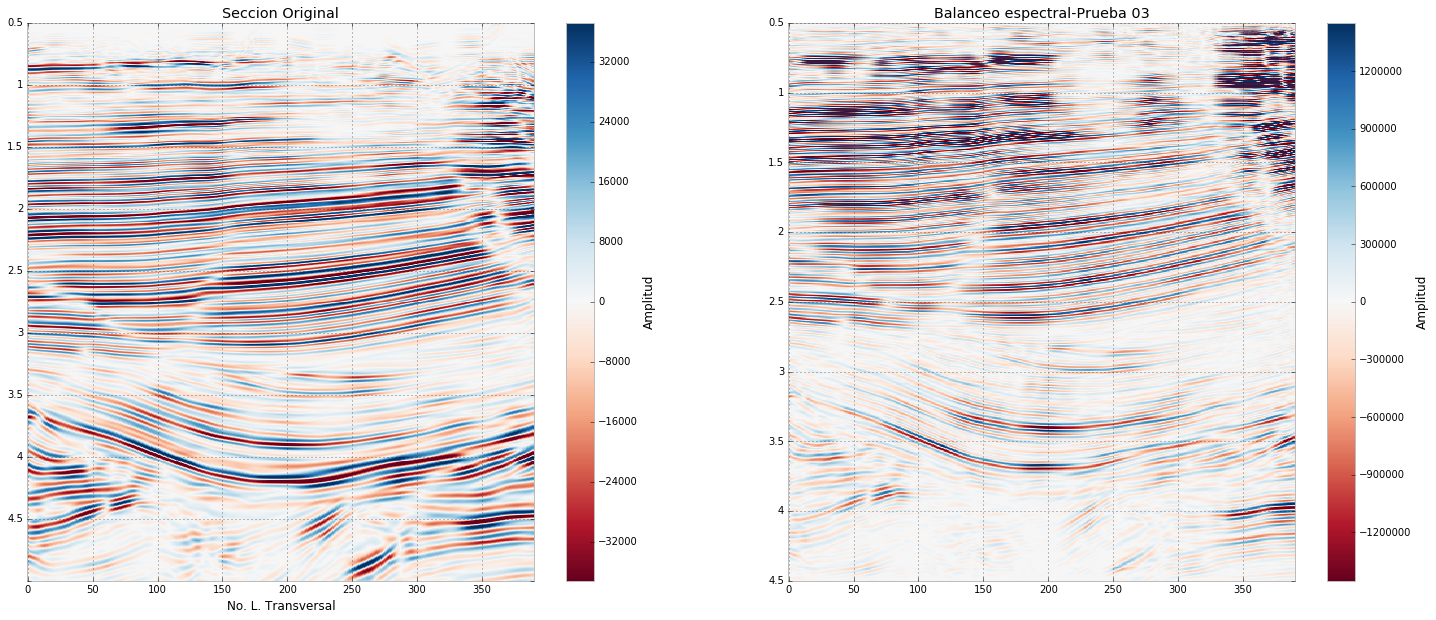

In [29]:
plt.figure(figsize=(25,10))
#---------------------------------------------------------------------------------
a=plt.subplot(121)
plt.imshow(inline_ori.T, cmap="RdBu", vmin=-vma, vmax=vma, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0.5); plt.yticks(np.arange(0,1126,125), [0.5,1,1.5,2,2.5,3,3.5,4,4.5])
a.set_title('Seccion Original'); a.set_xlabel('No. L. Transversal')
cbar= plt.colorbar()
cbar.set_label('Amplitud')

e=plt.subplot(122)
plt.imshow(inline_balesp2.T, cmap="RdBu", vmin=-vme, vmax=vme, aspect='auto', interpolation='nearest')
plt.ylim(4.5,0.5); plt.yticks(np.arange(0,1001,125), [0.5,1,1.5,2,2.5,3,3.5,4,4.5])
e.set_title('Balanceo espectral-Prueba 03'); c.set_xlabel('No. L. Transversal')
cbar= plt.colorbar(); cbar.set_label('Amplitud')

plt.show()

#### Vectores  t1 y t2 

Los técnicas de derivada y multiplicador de fase se calcularon sobre un volumen de tiempo t1[0,5.1] mientras que el balanceo espectral se realizó en un volumen con tiempo t2[0s,4.5s].

In [30]:
dt = 0.004 #Intervalo de muestreo
maxt1 = 5.104 # Tiempo total
maxt2 = 4.504 # Tiempo total de la sección de espectro balanceado Prueba 01
maxt3 = 4.504 # Tiempo total de la sección de espectro balanceado Prueba 02 y 03
mint3 = 0.5 # Tiempo total de la sección de espectro balanceado Prueba 02 y 03

t1 = np.arange(0, maxt1, dt)
t2 = np.arange(0,maxt2, dt)
t3 = np.arange(mint3,maxt3, dt)

#### Extracción de la traza no. 100

La traza no. 100 corresponde a intersección de las líneas longidinal y transversal en la ubicación del Pozo A.

In [31]:
traza_ori = ori.traces[100]
traza_der2 = der2.traces[100]
traza_der4 = der4.traces[100]
traza_mult2 = mult2.traces[100]
traza_mult3 = mult3.traces[100]
traza_multn1n3 = multn1n3.traces[100]
traza_multn1n3n5 = multn1n3n5.traces[100]
traza_balesp = balesp.traces[100]
traza_balesp1 = balesp1.traces[100]
traza_balesp2 = balesp2.traces[100]

#### Reescalando la traza sísmica original a valores entre [-1,1]

$ X' = 2\times \frac{X-Xmin}{Xmax-Xmin}-1 $

In [32]:
resc_traza_ori = 2 * ((traza_ori.data - (-51813)) / (51813 - (-51813)))-1

In [33]:
print(len(traza_balesp2.data)); print(len(t3)) 

1001
1001


#### Comparación entre las diferentes técnica de incremento de frecuencia

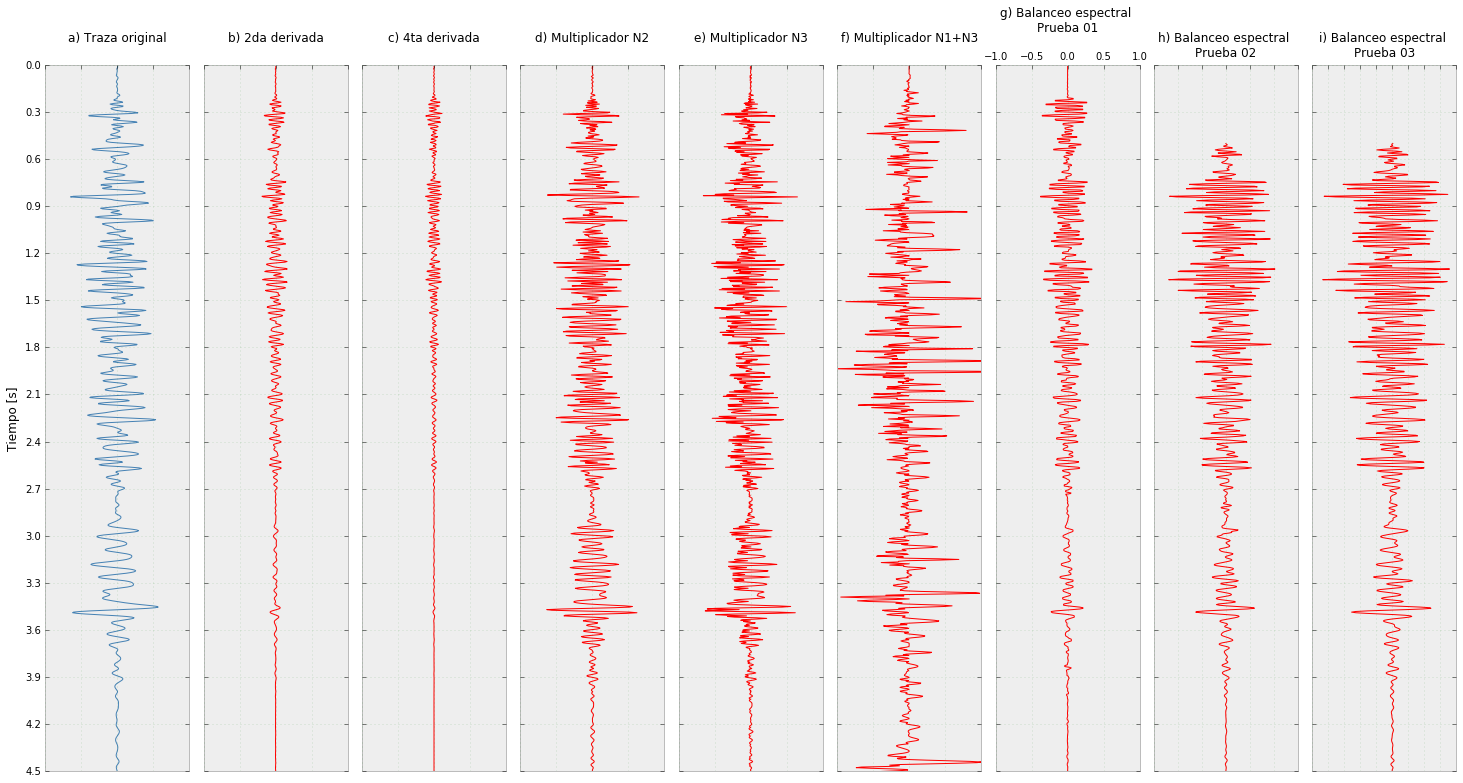

In [34]:
f1 = plt.figure(figsize = [10,14])
plt.style.use('bmh')
#----------------------------------------------------------------------
# Traza original
curv1 = f1.add_axes([0, 0, 0.2,0.7])
curv1.plot(traza_ori.data, t1,'steelblue', alpha=1, lw=1)
curv1.set_xlabel('a) Traza original\n', fontsize = '12' )
curv1.set_ylabel('Tiempo ' + '[s]', fontsize = '12' )
curv1.set_ylim(0, 4.5)
curv1.set_xlim(-80000, 80000)
curv1.set_yticks(np.linspace (0,4.5,16) )
curv1.set_xticks(np.linspace (-80000,80000,5))
curv1.set_xticklabels('')
curv1.xaxis.tick_top()
curv1.xaxis.set_label_position('top')
curv1.invert_yaxis()
curv1.grid(True, c="g", alpha=0.3)

# Segunda derivada
curv2 = f1.add_axes([0.22, 0, 0.2,0.7]) 
curv2.plot(traza_der2.data, t1,'r', alpha=1, lw=1)
curv2.set_xlabel('b) 2da derivada\n', fontsize = '12' )
curv2.set_ylim(0,4.5)
curv2.set_xlim(-80000, 80000)
curv2.set_xticks(np.linspace (-80000,80000,5) )
curv2.set_yticks(np.linspace (0,4.5,16))
curv2.set_yticklabels('')
curv2.set_xticklabels('')
curv2.xaxis.tick_top()
curv2.xaxis.set_label_position('top')
curv2.invert_yaxis()
curv2.grid(True, c="g", alpha=0.3)

# Cuarta derivada
curv3 = f1.add_axes([0.44, 0, 0.2,0.7]) 
curv3.plot(traza_der4.data, t1,'r', alpha=1, lw=1)
curv3.set_xlabel('c) 4ta derivada\n', fontsize = '12' )
curv3.set_ylim(0,4.5)
curv3.set_xlim(-80000, 80000)
curv3.set_xticks(np.linspace (-80000,80000,5) )
curv3.set_yticks(np.linspace (0,4.5,16))
curv3.set_yticklabels('')
curv3.set_xticklabels('')
curv3.xaxis.tick_top()
curv3.xaxis.set_label_position('top')
curv3.invert_yaxis()
curv3.grid(True, c="g", alpha=0.3)

# Multiplicador N2
curv4 = f1.add_axes([0.66, 0, 0.2,0.7]) 
curv4.plot(traza_mult2.data, t1,'r', alpha=1, lw=1)
curv4.set_xlabel('d) Multiplicador N2\n', fontsize = '12' )
curv4.set_ylim(0,4.5)
curv4.set_xlim(-80000, 80000)
curv4.set_xticks(np.linspace (-80000,80000,5) )
curv4.set_yticks(np.linspace (0,4.5,16))
curv4.set_yticklabels('')
curv4.set_xticklabels('')
curv4.xaxis.tick_top()
curv4.xaxis.set_label_position('top')
curv4.invert_yaxis()
curv4.grid(True, c="g", alpha=0.3)

# Multiplicador N3 
curv5 = f1.add_axes([0.88, 0, 0.2,0.7]) 
curv5.plot(traza_mult3.data, t1,'r', alpha=1, lw=1)
curv5.set_xlabel('e) Multiplicador N3\n', fontsize = '12' )
curv5.set_ylim(0,4.5)
curv5.set_xlim(-80000, 80000)
curv5.set_xticks(np.linspace (-80000,80000,5) )
curv5.set_yticks(np.linspace (0,4.5,16))
curv5.set_yticklabels('')
curv5.set_xticklabels('')
curv5.xaxis.tick_top()
curv5.xaxis.set_label_position('top')
curv5.invert_yaxis()
curv5.grid(True, c="g", alpha=0.3)

# Suma de multiplicadores N1+N3
curv6 = f1.add_axes([1.10, 0, 0.2,0.7]) 
curv6.plot(traza_multn1n3.data, t1,'r', alpha=1, lw=1)
curv6.set_xlabel('f) Multiplicador N1+N3\n', fontsize = '12' )
curv6.set_ylim(0,4.5)
curv6.set_xlim(-80000, 80000)
curv6.set_xticks(np.linspace (-80000,80000,5) )
curv6.set_yticks(np.linspace (0,4.5,16))
curv6.set_yticklabels('')
curv6.set_xticklabels('')
curv6.xaxis.tick_top()
curv6.xaxis.set_label_position('top')
curv6.invert_yaxis()
curv6.grid(True, c="g", alpha=0.3)

# Balanceo espectral Prueba 01
curv7 = f1.add_axes([1.32, 0, 0.2,0.7]) 
curv7.plot(traza_balesp.data, t2,'r', alpha=1, lw=1)
curv7.set_xlabel('g) Balanceo espectral \nPrueba 01\n', fontsize = '12' )
curv7.set_ylim(0,4.5)
curv7.set_xlim(-1, 1)
curv7.set_xticks(np.linspace (-1,1,5) )
curv7.set_yticks(np.linspace (0,4.5,16))
curv7.set_yticklabels('')
#curv7.set_xticklabels('')
curv7.xaxis.tick_top()
curv7.xaxis.set_label_position('top')
curv7.invert_yaxis()
curv7.grid(True, c="g", alpha=0.3)

# Balanceo espectral Prueba 02
curv8 = f1.add_axes([1.54, 0, 0.2,0.7]) 
curv8.plot(traza_balesp1.data, t3,'r', alpha=1, lw=1)
curv8.set_xlabel('h) Balanceo espectral \nPrueba 02', fontsize = '12' )
curv8.set_ylim(0,4.5)
#curv8.set_xlim(-1, 1)
#curv8.set_xticks(np.linspace (-1,1,5) )
curv8.set_yticks(np.linspace (0,4.5,16))
curv8.set_yticklabels('')
curv8.set_xticklabels('')
curv8.xaxis.tick_top()
curv8.xaxis.set_label_position('top')
curv8.invert_yaxis()
curv8.grid(True, c="g", alpha=0.3)

# Balanceo espectral Prueba 03
curv9 = f1.add_axes([1.76, 0, 0.2,0.7]) 
curv9.plot(traza_balesp2.data, t3,'r', alpha=1, lw=1)
curv9.set_xlabel('i) Balanceo espectral \nPrueba 03', fontsize = '12' )
curv9.set_ylim(0,4.5)
#curv8.set_xlim(-1, 1)
#curv8.set_xticks(np.linspace (-1,1,5) )
curv9.set_yticks(np.linspace (0,4.5,16))
curv9.set_yticklabels('')
curv9.set_xticklabels('')
curv9.xaxis.tick_top()
curv9.xaxis.set_label_position('top')
curv9.invert_yaxis()
curv9.grid(True, c="g", alpha=0.3)

plt.show()

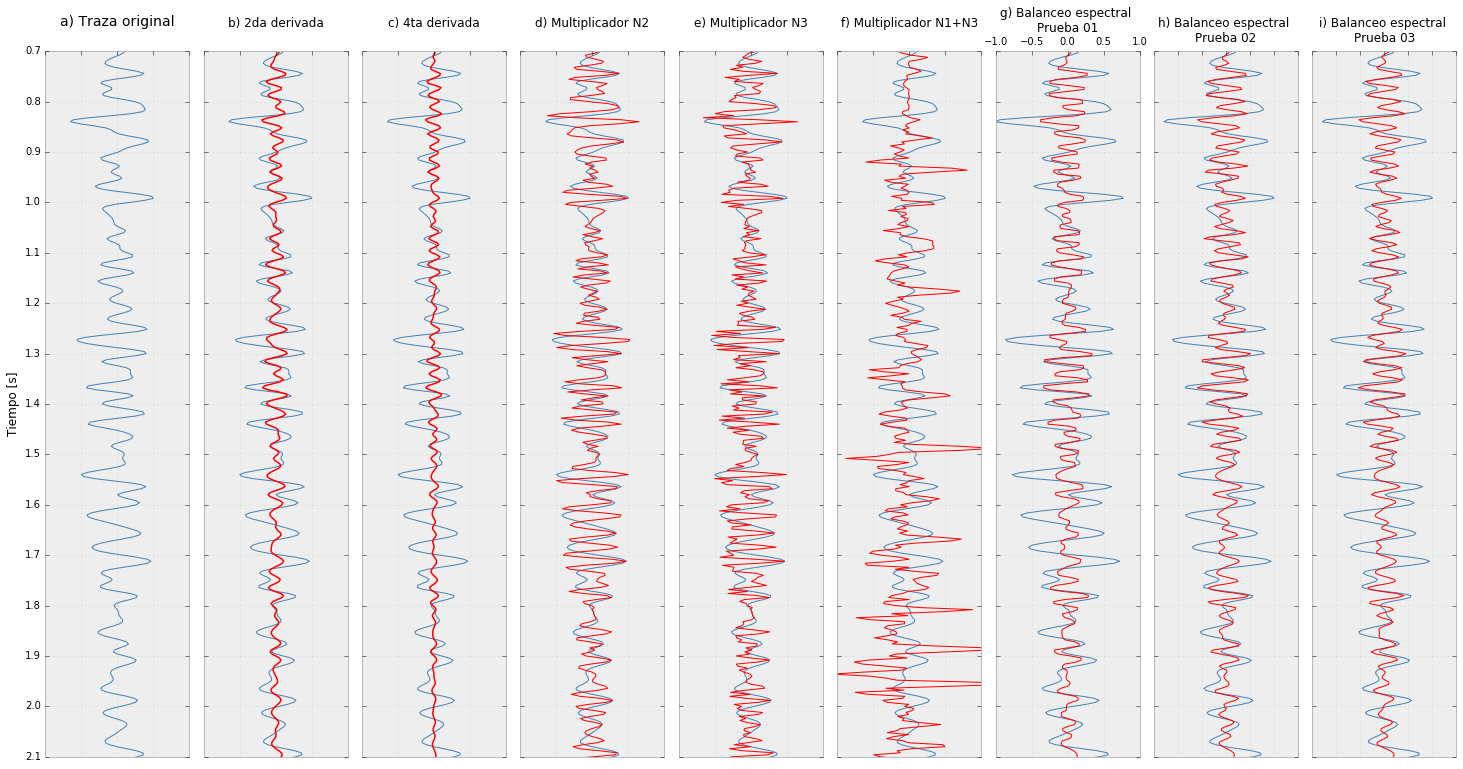

In [35]:
f1 = plt.figure(figsize = [10,14])
plt.style.use('bmh')
#----------------------------------------------------------------------
# Traza original
curv1 = f1.add_axes([0, 0, 0.2,0.7])
curv1.plot(traza_ori.data, t1,'steelblue', alpha=1, lw=1)
curv1.set_xlabel('a) Traza original\n', fontsize = '14' )
curv1.set_ylabel('Tiempo ' + '[s]', fontsize = '12' )
curv1.set_ylim(0.7, 2.1)
curv1.set_xlim(-80000, 80000)
curv1.set_yticks(np.linspace (0.7,2.1,15) )
curv1.set_xticks(np.linspace (-80000,80000,5))
curv1.set_xticklabels('')
curv1.xaxis.tick_top()
curv1.xaxis.set_label_position('top')
curv1.invert_yaxis()
curv1.grid(True, c="g", alpha=0.3)

# Segunda derivada
curv2 = f1.add_axes([0.22, 0, 0.2,0.7]) 
curv2.plot(traza_ori.data, t1,'steelblue', alpha=1, lw=1)
curv2.plot(traza_der2.data, t1,'r', alpha=1, lw=1.5)
curv2.set_xlabel('b) 2da derivada\n', fontsize = '12' )
curv2.set_ylim(0.7,2.1)
curv2.set_xlim(-80000, 80000)
curv2.set_xticks(np.linspace (-80000,80000,5) )
curv2.set_yticks(np.linspace (0.7,2.1,15))
curv2.set_yticklabels('')
curv2.set_xticklabels('')
curv2.xaxis.tick_top()
curv2.xaxis.set_label_position('top')
curv2.invert_yaxis()
curv2.grid(True, c="g", alpha=0.3)

# Cuarta derivada
curv3 = f1.add_axes([0.44, 0, 0.2,0.7]) 
curv3.plot(traza_ori.data, t1,'steelblue', alpha=1, lw=1)
curv3.plot(traza_der4.data, t1,'r', alpha=1, lw=1.5)
curv3.set_xlabel('c) 4ta derivada\n', fontsize = '12' )
curv3.set_ylim(0.7,2.1)
curv3.set_xlim(-80000, 80000)
curv3.set_xticks(np.linspace (-80000,80000,5) )
curv3.set_yticks(np.linspace (0.7,2.1,15))
curv3.set_yticklabels('')
curv3.set_xticklabels('')
curv3.xaxis.tick_top()
curv3.xaxis.set_label_position('top')
curv3.invert_yaxis()
curv3.grid(True, c="g", alpha=0.3)

# Multiplicador N2
curv4 = f1.add_axes([0.66, 0, 0.2,0.7])
curv4.plot(traza_ori.data, t1,'steelblue', alpha=1, lw=1)
curv4.plot(traza_mult2.data, t1,'r', alpha=1, lw=1)
curv4.set_xlabel('d) Multiplicador N2\n', fontsize = '12' )
curv4.set_ylim(0.7,2.1)
curv4.set_xlim(-80000, 80000)
curv4.set_xticks(np.linspace (-80000,80000,5) )
curv4.set_yticks(np.linspace (0.7,2.1,15))
curv4.set_yticklabels('')
curv4.set_xticklabels('')
curv4.xaxis.tick_top()
curv4.xaxis.set_label_position('top')
curv4.invert_yaxis()
curv4.grid(True, c="g", alpha=0.3)

# Multiplicador N3 
curv5 = f1.add_axes([0.88, 0, 0.2,0.7]) 
curv5.plot(traza_ori.data, t1,'steelblue', alpha=1, lw=1)
curv5.plot(traza_mult3.data, t1,'r', alpha=1, lw=1)
curv5.set_xlabel('e) Multiplicador N3\n', fontsize = '12' )
curv5.set_ylim(0.7,2.1)
curv5.set_xlim(-80000, 80000)
curv5.set_xticks(np.linspace (-80000,80000,5) )
curv5.set_yticks(np.linspace (0.7,2.1,15))
curv5.set_yticklabels('')
curv5.set_xticklabels('')
curv5.xaxis.tick_top()
curv5.xaxis.set_label_position('top')
curv5.invert_yaxis()
curv5.grid(True, c="g", alpha=0.3)

# Suma de multiplicadores N1+N3
curv6 = f1.add_axes([1.10, 0, 0.2,0.7]) 
curv6.plot(traza_ori.data, t1,'steelblue', alpha=1, lw=1)
curv6.plot(traza_multn1n3.data, t1,'r', alpha=1, lw=1)
curv6.set_xlabel('f) Multiplicador N1+N3\n', fontsize = '12' )
curv6.set_ylim(0.7,2.1)
curv6.set_xlim(-80000, 80000)
curv6.set_xticks(np.linspace (-80000,80000,5) )
curv6.set_yticks(np.linspace (0.7,2.1,15))
curv6.set_yticklabels('')
curv6.set_xticklabels('')
curv6.xaxis.tick_top()
curv6.xaxis.set_label_position('top')
curv6.invert_yaxis()
curv6.grid(True, c="g", alpha=0.3)

# Balanceo espectral Prueba 01
curv7 = f1.add_axes([1.32, 0, 0.2,0.7]) 
curv7.plot(resc_traza_ori, t1,'steelblue', alpha=1, lw=1)
curv7.plot(traza_balesp.data, t2,'r', alpha=1, lw=1)
curv7.set_xlabel('g) Balanceo espectral \nPrueba 01', fontsize = '12' )
curv7.set_ylim(0.7,2.1)
curv7.set_xlim(-1, 1)
curv7.set_xticks(np.linspace (-1,1,5) )
curv7.set_yticks(np.linspace (0.7,2.1,15))
curv7.set_yticklabels('')
#curv7.set_xticklabels('')
curv7.xaxis.tick_top()
curv7.xaxis.set_label_position('top')
curv7.invert_yaxis()
curv7.grid(True, c="g", alpha=0.3)

# Balanceo espectral Prueba 02
curv8 = f1.add_axes([1.54, 0, 0.2,0.7]) 
curv8.plot(traza_ori.data*100, t1,'steelblue', alpha=1, lw=1)
curv8.plot(traza_balesp1.data, t3,'r', alpha=1, lw=1)
curv8.set_xlabel('h) Balanceo espectral \nPrueba 02', fontsize = '12' )
curv8.set_ylim(0.7,2.1)
#curv8.set_xlim(-1, 1)
#curv8.set_xticks(np.linspace (-1,1,5) )
curv8.set_yticks(np.linspace (0.7,2.1,15))
curv8.set_yticklabels('')
curv8.set_xticklabels('')
curv8.xaxis.tick_top()
curv8.xaxis.set_label_position('top')
curv8.invert_yaxis()
curv8.grid(True, c="g", alpha=0.3)

# Balanceo espectral Prueba 03
curv9 = f1.add_axes([1.76, 0, 0.2,0.7]) 
curv9.plot(traza_ori.data*100, t1,'steelblue', alpha=1, lw=1)
curv9.plot(traza_balesp2.data, t3,'r', alpha=1, lw=1)
curv9.set_xlabel('i) Balanceo espectral \nPrueba 03', fontsize = '12' )
curv9.set_ylim(0.7,2.1)
#curv8.set_xlim(-1, 1)
#curv8.set_xticks(np.linspace (-1,1,5) )
curv9.set_yticks(np.linspace (0.7,2.1,15))
curv9.set_yticklabels('')
curv9.set_xticklabels('')
curv9.xaxis.tick_top()
curv9.xaxis.set_label_position('top')
curv9.invert_yaxis()
curv9.grid(True, c="g", alpha=0.3)

plt.show()

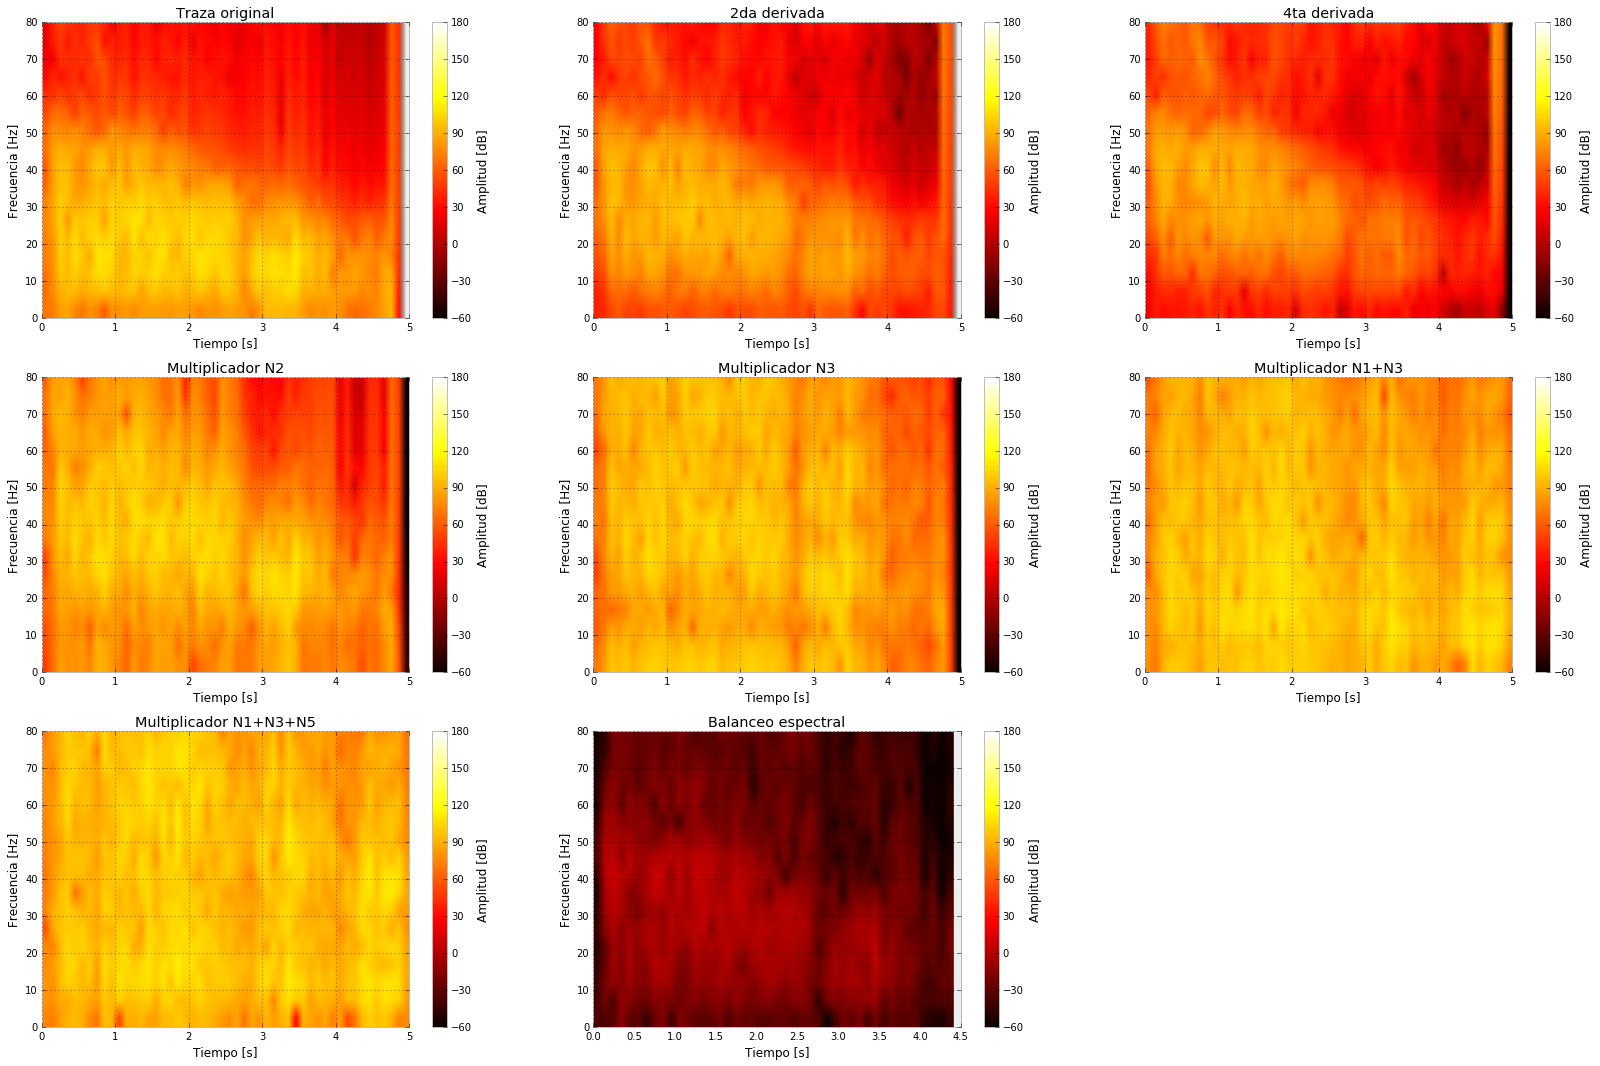

In [40]:
plt.figure(figsize=(28,18))

window_time = 0.2
window_samples = int(window_time/dt)
noverlap = int(window_samples/2)
Fs = 1/dt # frecuencia de muestreo (muestras por unidad de tiempo) 

a=plt.subplot(331)
plt.specgram(traza_ori.data, NFFT=window_samples, Fs=Fs, noverlap=noverlap, 
             scale='dB', cmap='hot', mode='magnitude', vmax=180, vmin=-60)
cbar= plt.colorbar()
cbar.set_label('Amplitud [dB]')
a.set_title('Traza original'); a.set_xlabel('Tiempo [s]'); a.set_ylabel('Frecuencia [Hz]')
plt.ylim(0,80)

a=plt.subplot(332)
plt.specgram(traza_der2.data, NFFT=window_samples, Fs=Fs, noverlap=noverlap, 
             scale='dB', cmap='hot', mode='magnitude', vmax=180, vmin=-60)
cbar= plt.colorbar()
cbar.set_label('Amplitud [dB]')
a.set_title('2da derivada'); a.set_xlabel('Tiempo [s]'); a.set_ylabel('Frecuencia [Hz]')
plt.ylim(0,80)

a=plt.subplot(333)
plt.specgram(traza_der4.data, NFFT=window_samples, Fs=Fs, noverlap=noverlap,
             scale='dB', cmap='hot', mode='magnitude', vmax=180, vmin=-60)
cbar= plt.colorbar()
cbar.set_label('Amplitud [dB]')
a.set_title('4ta derivada'); a.set_xlabel('Tiempo [s]'); a.set_ylabel('Frecuencia [Hz]')
plt.ylim(0,80)

a=plt.subplot(334)
plt.specgram(traza_mult2.data, NFFT=window_samples, Fs=Fs, noverlap=noverlap,
             scale='dB', cmap='hot', mode='magnitude', vmax=180, vmin=-60)
cbar= plt.colorbar()
cbar.set_label('Amplitud [dB]')
a.set_title('Multiplicador N2'); a.set_xlabel('Tiempo [s]'); a.set_ylabel('Frecuencia [Hz]')
plt.ylim(0,80)

a=plt.subplot(335)
plt.specgram(traza_mult3.data, NFFT=window_samples, Fs=Fs, noverlap=noverlap,
             scale='dB', cmap='hot', mode='magnitude', vmax=180, vmin=-60)
cbar= plt.colorbar()
cbar.set_label('Amplitud [dB]')
a.set_title('Multiplicador N3'); a.set_xlabel('Tiempo [s]'); a.set_ylabel('Frecuencia [Hz]')
plt.ylim(0,80)

a=plt.subplot(336)
plt.specgram(traza_multn1n3.data, NFFT=window_samples, Fs=Fs, noverlap=noverlap,
             scale='dB', cmap='hot', mode='magnitude', vmax=180, vmin=-60)
cbar= plt.colorbar()
cbar.set_label('Amplitud [dB]')
a.set_title('Multiplicador N1+N3'); a.set_xlabel('Tiempo [s]'); a.set_ylabel('Frecuencia [Hz]')
plt.ylim(0,80)

a=plt.subplot(337)
plt.specgram(traza_multn1n3n5.data, NFFT=window_samples, Fs=Fs, noverlap=noverlap, 
             scale='dB', cmap='hot', mode='magnitude', vmax=180, vmin=-60)
cbar= plt.colorbar()
cbar.set_label('Amplitud [dB]')
a.set_title('Multiplicador N1+N3+N5'); a.set_xlabel('Tiempo [s]'); a.set_ylabel('Frecuencia [Hz]')
plt.ylim(0,80)


a=plt.subplot(338)
plt.specgram(traza_balesp.data, NFFT=window_samples, Fs=Fs, noverlap=noverlap, 
             scale='dB', cmap='hot', mode='magnitude', vmax=180, vmin=-60)
cbar= plt.colorbar()
cbar.set_label('Amplitud [dB]')
a.set_title('Balanceo espectral'); a.set_xlabel('Tiempo [s]'); a.set_ylabel('Frecuencia [Hz]')
plt.ylim(0,80)

plt.show()

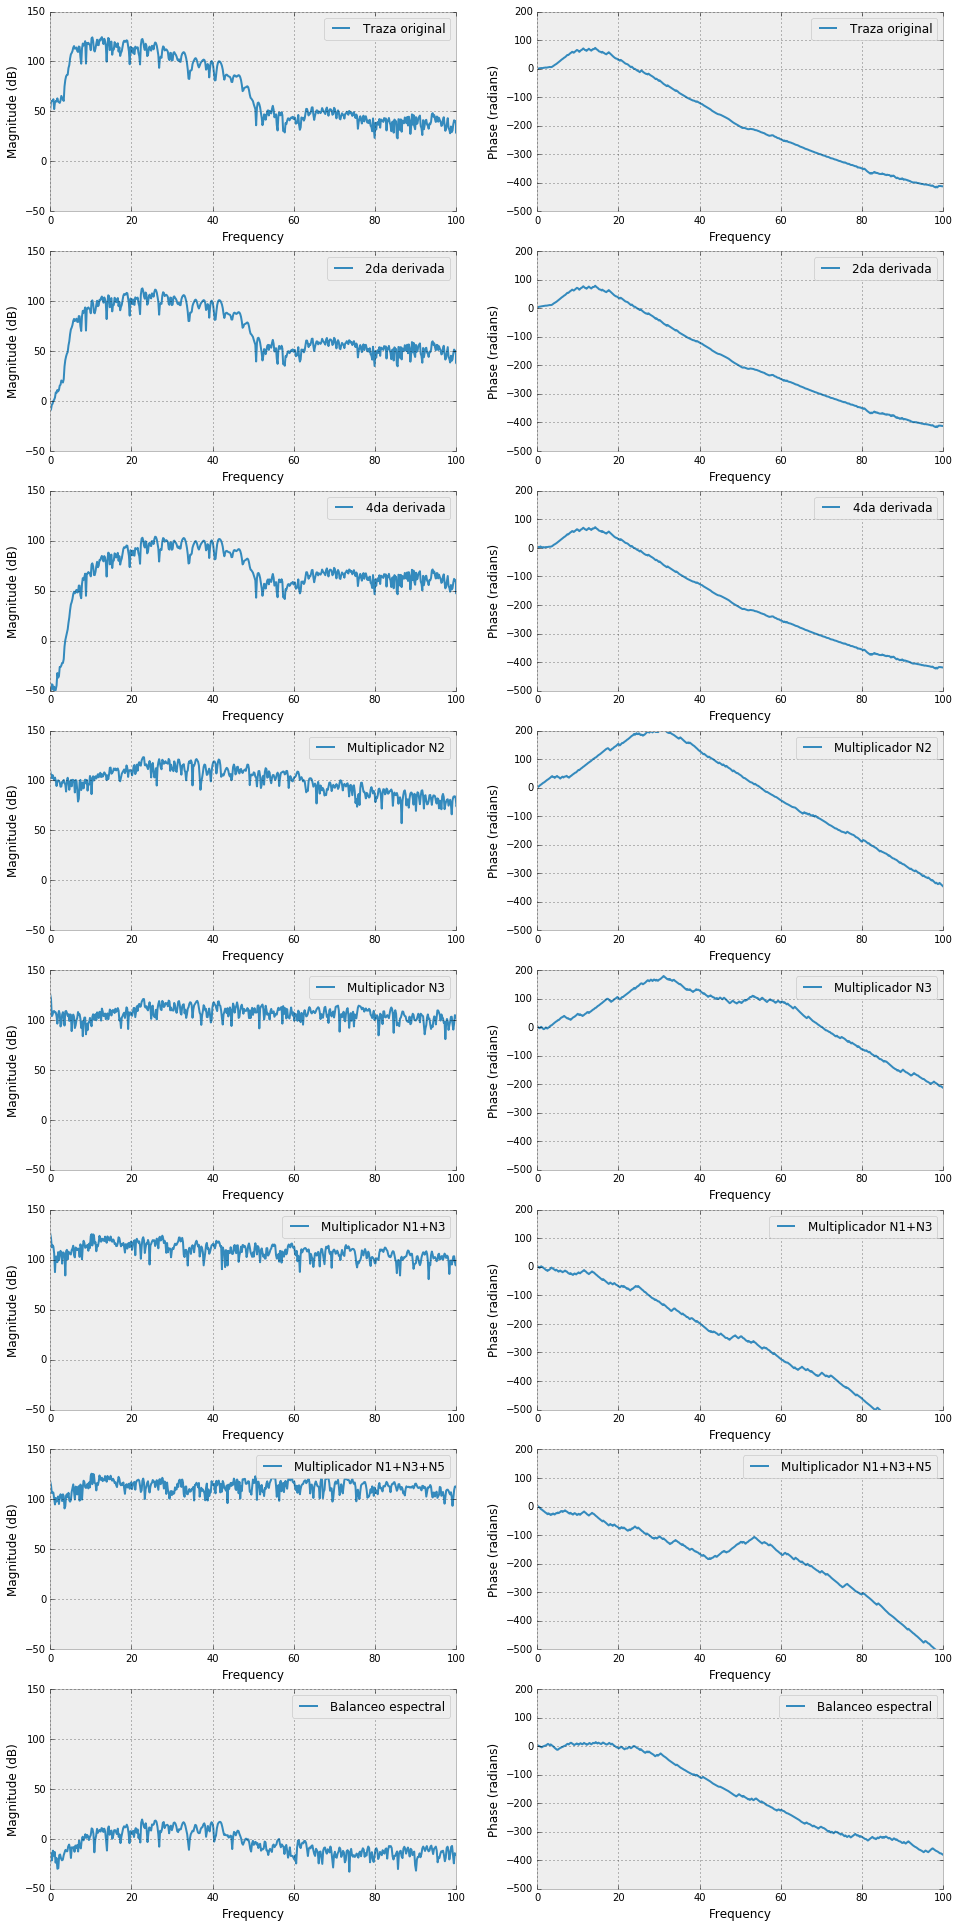

In [37]:
plt.figure(figsize=(16,68))
#-----------------------------------------------------------------------
plt.subplot(16,2,1) #Traza original-Espectro de amplitud
plt.magnitude_spectrum(traza_ori.data, Fs=Fs, label='Traza original', scale='dB')
plt.xlim(0,100); plt.ylim(-50,150)
plt.legend()
plt.subplot(16,2,2) #Traza original-Espectro de fase
plt.phase_spectrum(traza_ori.data, Fs=Fs, label='Traza original')
plt.xlim(0,100); plt.ylim(-500,200)
plt.legend()
#-----------------------------------------------------------------------
plt.subplot(16,2,3) #2da derivada-Espectro de amplitud
plt.magnitude_spectrum(traza_der2.data, Fs=Fs, label='2da derivada',scale='dB')
plt.xlim(0,100);plt.ylim(-50,150)
plt.legend()
plt.subplot(16,2,4) #2da derivada-Espectro de fase
plt.phase_spectrum(traza_der2.data, Fs=Fs, label='2da derivada')
plt.xlim(0,100); plt.ylim(-500,200)
plt.legend()
#------------------------------------------------------------------------
plt.subplot(16,2,5) #4ta derivada-Espectro de amplitud
plt.magnitude_spectrum(traza_der4.data, Fs=Fs, label='4da derivada',scale='dB')
plt.xlim(0,100);plt.ylim(-50,150)
plt.legend()
plt.subplot(16,2,6) #4ta derivada-Espectro de fase
plt.phase_spectrum(traza_der4.data, Fs=Fs, label='4da derivada')
plt.xlim(0,100); plt.ylim(-500,200)
plt.legend()
#------------------------------------------------------------------------
plt.subplot(16,2,7) #Multiplicador N2-Espectro de amplitud
plt.magnitude_spectrum(traza_mult2.data, Fs=Fs, label='Multiplicador N2',scale='dB')
plt.xlim(0,100);plt.ylim(-50,150)
plt.legend()
plt.subplot(16,2,8) #Multiplicador N2-Espectro de fase
plt.phase_spectrum(traza_mult2.data, Fs=Fs, label='Multiplicador N2')
plt.xlim(0,100); plt.ylim(-500,200)
plt.legend()
#------------------------------------------------------------------------
plt.subplot(16,2,9) #Multiplicador N3-Espectro de amplitud
plt.magnitude_spectrum(traza_mult3.data, Fs=Fs, label='Multiplicador N3', scale='dB')
plt.xlim(0,100);plt.ylim(-50,150)
plt.legend()
plt.subplot(16,2,10) #Multiplicador N3-Espectro de fase
plt.phase_spectrum(traza_mult3.data, Fs=Fs, label='Multiplicador N3')
plt.xlim(0,100); plt.ylim(-500,200)
plt.legend()
#------------------------------------------------------------------------
plt.subplot(16,2,11) #Multiplicador N1+N3-Espectro de amplitud
plt.magnitude_spectrum(traza_multn1n3.data, Fs=Fs, label='Multiplicador N1+N3',scale='dB')
plt.xlim(0,100);plt.ylim(-50,150)
plt.legend()
plt.subplot(16,2,12) #Multiplicador N1+N3-Espectro de fase
plt.phase_spectrum(traza_multn1n3.data, Fs=Fs, label='Multiplicador N1+N3')
plt.xlim(0,100); plt.ylim(-500,200)
plt.legend()
#------------------------------------------------------------------------
plt.subplot(16,2,13) #Multiplicador N1+N3+N5-Espectro de amplitud
plt.magnitude_spectrum(traza_multn1n3n5.data, Fs=Fs, label='Multiplicador N1+N3+N5',scale='dB')
plt.xlim(0,100);plt.ylim(-50,150)
plt.legend()
plt.subplot(16,2,14) #Multiplicador N1+N3+N5-Espectro de fase
plt.phase_spectrum(traza_multn1n3n5.data, Fs=Fs, label='Multiplicador N1+N3+N5')
plt.xlim(0,100); plt.ylim(-500,200)
plt.legend()
#------------------------------------------------------------------------
plt.subplot(16,2,15) #Balanceo espectral-Espectro de amplitud
plt.magnitude_spectrum(traza_balesp.data, Fs=Fs, label='Balanceo espectral',scale='dB')
plt.xlim(0,100);plt.ylim(-50,150)
plt.legend()
plt.subplot(16,2,16) #Balanceo espectral-Espectro de fase
plt.phase_spectrum(traza_balesp.data, Fs=Fs, label='Balanceo espectral')
plt.xlim(0,100); plt.ylim(-500,200)
plt.legend()

plt.show()

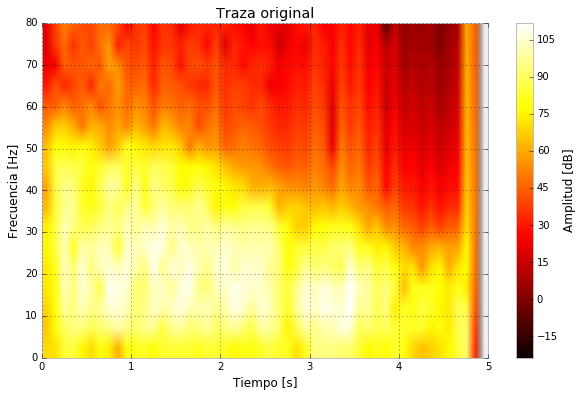

In [38]:
fig=plt.figure(figsize=(10,6))

a=fig.add_subplot(111)
window_time = 0.2
window_samples = int(window_time/dt)
noverlap = int(window_samples/2)

plt.specgram(traza_ori.data, NFFT=window_samples, Fs=Fs, noverlap=noverlap, 
             scale='dB', cmap='hot', mode='magnitude')
cbar= plt.colorbar()
cbar.set_label('Amplitud [dB]')
a.set_title('Traza original'); a.set_xlabel('Tiempo [s]'); a.set_ylabel('Frecuencia [Hz]')
plt.ylim(0,80)

plt.show()